# Cryptocurrency Research

## 1) Попробуем создать модель, предсказывающую капитализацию BTC

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
bitcoin=pd.read_csv("coin_Bitcoin.csv")
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
bitcoin.drop(["Name"],axis=1, inplace=True)
bitcoin.drop(["SNo"],axis=1, inplace=True)
bitcoin.drop(["Symbol"],axis=1, inplace=True)

bitcoin = bitcoin[242:].reset_index(drop=True)
bitcoin['Marketcap'] = bitcoin['Marketcap'] / 10**9

In [ ]:
import datetime as dt
bitcoin["Date"]=pd.to_datetime(bitcoin["Date"])
bitcoin['Date_year'] = bitcoin["Date"].dt.year
bitcoin['Date_month'] = bitcoin["Date"].dt.month
bitcoin['Date_day'] = bitcoin["Date"].dt.day
bitcoin['Date_hour'] = bitcoin["Date"].dt.hour
bitcoin['Date_minute'] = bitcoin["Date"].dt.minute
bitcoin['Date_second'] = bitcoin["Date"].dt.second
bitcoin.drop(["Date"],axis=1, inplace=True)
bitcoin.head()

,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_second
0,777.510010,713.599976,763.280029,735.070007,46862700.0,8.955395,2013,12,27,23,59,59
1,747.059998,705.349976,737.979980,727.830017,32505800.0,8.869919,2013,12,28,23,59,59
2,748.609985,714.440002,728.049988,745.049988,19011300.0,9.082104,2013,12,29,23,59,59
3,766.599976,740.239990,741.349976,756.130005,20707700.0,9.217168,2013,12,30,23,59,59
4,760.580017,738.169983,760.320007,754.010010,20897300.0,9.191325,2013,12,31,23,59,59


In [ ]:
X=bitcoin.drop(["Marketcap"], axis=1)
Y=bitcoin["Marketcap"]


В контексте задачи прогнозирования капитализации биткоина уместно будет использовать модель линейной регрессии (логистическая регрессия не является подходящим выбором,так как она используется для задач классификации, которые требуют предсказать вероятность принадлежности к определенным категориям или классам.

В данном случае использование accuracy_score не подходит для оценки качества модели, так как это метрика для задач классификации, а не для задачи регрессии. Вместо него воспользуемся коэффициентом детерминации (R^2), который показывает, насколько успешно модель "подходит" к нашим данным:  

Формула для R^2:

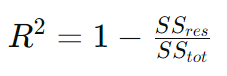

где $SSres$ - сумма квадратов остатков (расстояние между фактическими значениями и предсказанными значениями), а $SStot$- общая сумма квадратов (расстояние между фактическими значениями и средним значением целевой переменной).

R-квадрат (Коэффициент детерминации): Эта метрика предоставляет индикацию качества соответствия набора предсказаний фактическим значениям.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_score = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2_score)

print('')

mse = mean_squared_error(y_test, y_pred)
print("Средняя квадратичная ошибка (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Средняя абсолютная ошибка (MAE):", mae)

rmse = sqrt(mse)
print("Корень из средней квадратичной ошибки (RMSE):", rmse)

Коэффициент детерминации (R^2): 0.9996431873816641

Средняя квадратичная ошибка (MSE): 17.999865241399377
Средняя абсолютная ошибка (MAE): 3.0556846842596066
Корень из средней квадратичной ошибки (RMSE): 4.242624805636173


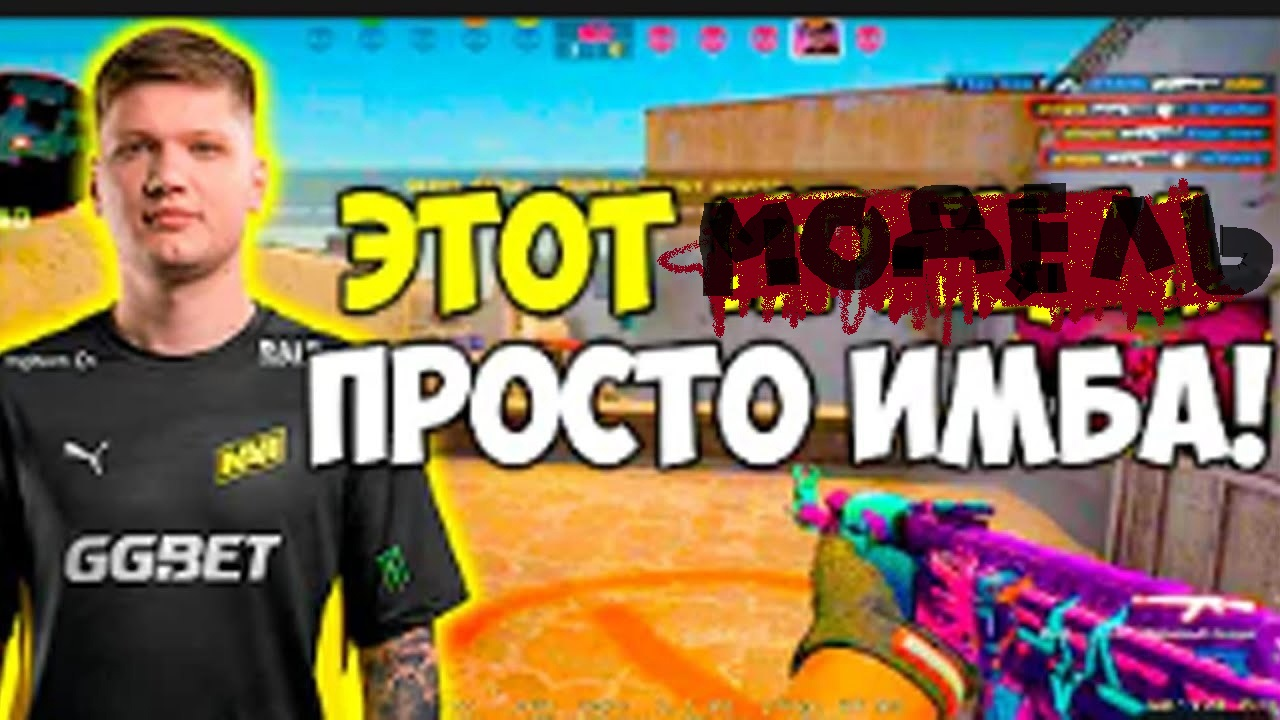

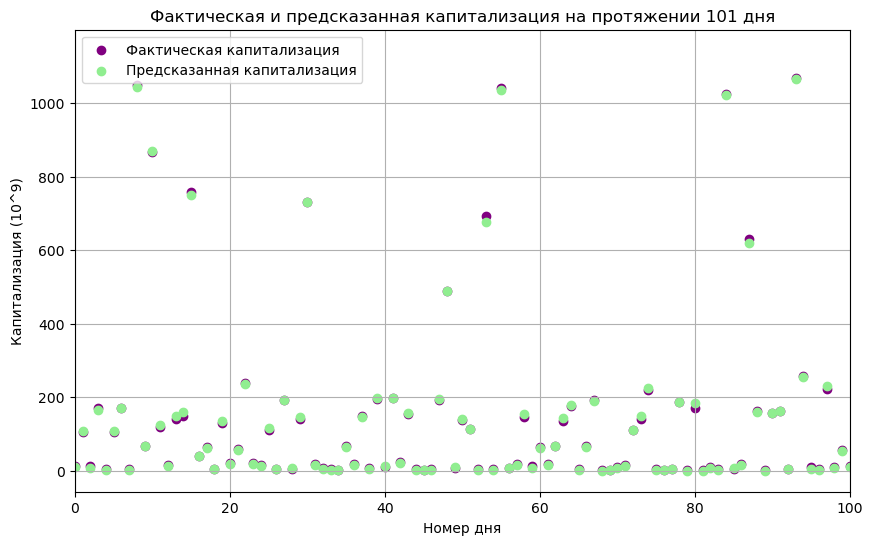

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='purple', label='Фактическая капитализация')
plt.scatter(range(len(y_pred)), y_pred, color='lightgreen', label='Предсказанная капитализация')

plt.ylabel('Капитализация (10^9)')
plt.xlabel('Номер дня')
plt.title('Фактическая и предсказанная капитализация на протяжении 101 дня')
plt.legend()
plt.grid(True)
plt.xlim(0, 100)

plt.show()

Количество дней можно повысить, но тогда график станет менее наглядным.

Коэффициент детерминации близок к 1, что свидетельствует о том, что  модель линейной регрессии хорошо соотносится с данными и хорошо объясняет изменчивость целевой переменной.

Однако это не повод инвеcтировать в btc, так как наша модель хорошо работает только на тестовых данных и не обобщается на новые, потому что она описывает не все факторы, влияющие на цену btc, но ее огромный плюс в наглядности и относительной простоте. Рынок крипты крайне сложен и подвержен множеству внешних воздействий (манипуляций), которые никак не описать.

## 2) Изучим корреляцию стоимости разных криптовалют

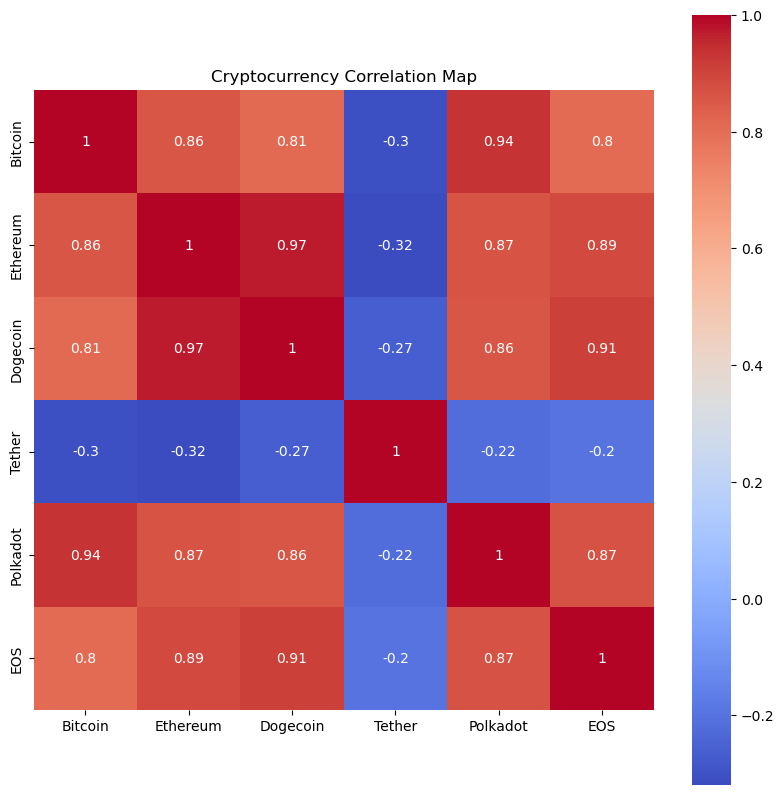

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files_to_use = ["coin_Bitcoin.csv", "coin_Ethereum.csv", "coin_Dogecoin.csv", "coin_Tether.csv","coin_Polkadot.csv", "coin_EOS.csv"]

df = pd.DataFrame()

for filename in files_to_use:
    currency_name = filename.split("_")[1].split(".")[0]  # Извлекаем название криптовалюты из имени файла
    temp_df = pd.read_csv(filename, usecols=["Date", "Close"], parse_dates=["Date"])
    temp_df.columns = ["Date", currency_name]

    if df.empty:
        df = temp_df
    else:
        df = df.merge(temp_df, on="Date",) # Объединяем датафреймы по столбцу "Date"

corrmat = df.corr(method='spearman') # Используем тест ранговой корреляции Спирмена

corrmat = corrmat.drop(columns=["Date"]).drop(index=["Date"])

# Создаем тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1., square=True, annot=True, cmap="coolwarm")
plt.title("Cryptocurrency Correlation Map")
plt.show()

Из этой матрицы наглядно видно, что цены альткоинов зачастую сильно коррелируют с ценой btc, то есть если btc испытывает сильное движение вверх или вниз, то это влияет на общее настроение рынка криптовалют и приводит к аналогичному движению цен на альткоинах, это активно используют day trades.

## 3) Стратегия DCA на BTC

DCA - это стратегия, при которой инвестор делит фиксированную сумму денег на равные части и инвестирует эти деньги на регулярной основе, независимо от цены актива.

Цель - анализ эффективности применения стратегии DCA на BTC.


Предположим, что мы инвестируем 1$ раз в день на протяжении 1825 дней с 27ого декабря 2013 года по 26ое декабря 2018 года.

In [ ]:
bitcoin['btc_bought_daily'] = 1 / bitcoin['Close']
bitcoin['sum_btc_daily'] = bitcoin['btc_bought_daily'].cumsum()

bitcoin['btc_bought_daily_usd'] = bitcoin['sum_btc_daily'] * bitcoin['Close']

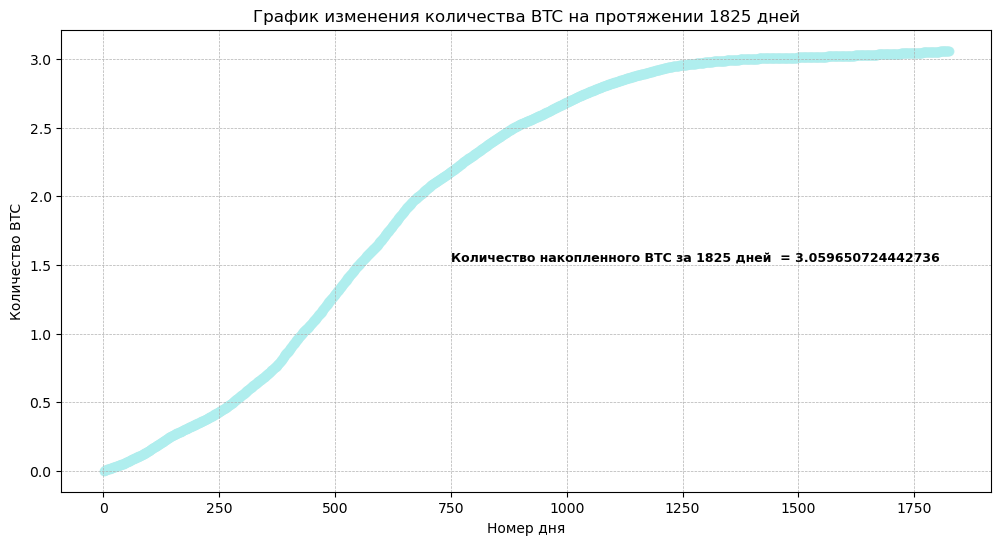

In [ ]:
days = list(range(1, 1826))
bitcoin_accumulated = bitcoin['sum_btc_daily'][:1825]

plt.figure(figsize=(12, 6))
plt.scatter(days, bitcoin_accumulated, color='paleturquoise', alpha=0.6)
plt.title("График изменения количества BTC на протяжении 1825 дней")
plt.xlabel("Номер дня")
plt.ylabel("Количество BTC")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

total_btc = f'Количество накопленного BTC за 1825 дней  = {bitcoin_accumulated[1824]}'
plt.annotate(total_btc, (750, bitcoin_accumulated.max()/2), fontweight='bold', fontsize=9)

plt.show()

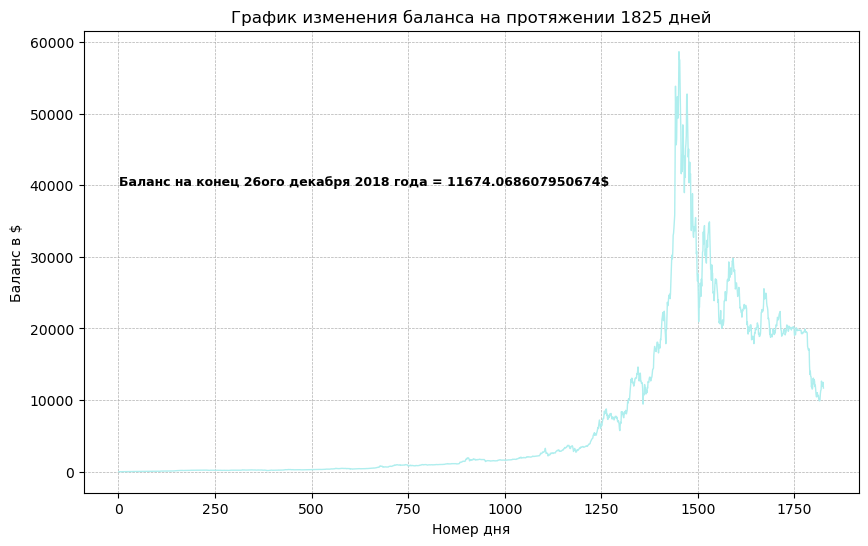

In [ ]:
days = range(1, 1826)
bitcoin_accumulated_usd = bitcoin['btc_bought_daily_usd'][:1825]

plt.figure(figsize=(10, 6))
plt.plot(days, bitcoin_accumulated_usd, color='paleturquoise', linewidth=1)
plt.title("График изменения баланса на протяжении 1825 дней")
plt.xlabel("Номер дня")
plt.ylabel("Баланс в $")

total_btc_usd = f'Баланс на конец 26ого декабря 2018 года = {bitcoin_accumulated_usd[1824]}$'
plt.annotate(total_btc_usd, (1, 40000), fontweight='bold', fontsize=9)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Итого мы потратили в общей сложности 1825$

Баланс на кошельке на конец 26ого декабря 2018 года составляет 11674$

Вывод: использовать стратегию DCA в инвестировании в BTC в период времени с начала 2014 года по конец 2018 было не ошибкой!!

## 4) BTC and ETH vs GOLD

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Bitcoin = pd.read_csv('coin_Bitcoin.csv')
Ethereum = pd.read_csv('coin_Ethereum.csv')
Gold = pd.read_csv('Gold Price.csv')

In [ ]:
Gold.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55


In [ ]:
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'])
Ethereum['Date'] = pd.to_datetime(Ethereum['Date'])

Cначала ограничим диапазон дат, включив в него только те даты, о которых у нас есть информация по всем трем активам. Изучив данные, мы поняли, что минимум 2015-08-08, максимум 2021-07-06.

Для анализа вводных данных мы объединили эти три набора данных в один большой набор данных. Просматривая документацию к набору данных GOLD, мы поняли, что цена закрытия была названа price. Также в наборах данных BTC и ETH есть столбец Name, который нам понадобится при объединении данных.

In [ ]:
Gold = Gold.rename(columns={'Price': 'Close'})
Gold['Name'] = 'Gold'
Gold.head()

,Date,Close,Open,High,Low,Volume,Chg%,Name
0,2014-01-01,29542,29435,29598,29340,2930,0.25,Gold
1,2014-01-02,29975,29678,30050,29678,3140,1.47,Gold
2,2014-01-03,29727,30031,30125,29539,3050,-0.83,Gold
3,2014-01-04,29279,29279,29279,29279,0,-1.51,Gold
4,2014-01-06,29119,29300,29395,29051,24380,-0.55,Gold


Объеденяем наши данные

In [ ]:
B1 = Bitcoin[['Name', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume']]
E1 = Ethereum[['Name', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume']]
G1 = Gold[['Name', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume']]
AllData = pd.concat([B1, E1, G1], ignore_index=True)
AllData['Date'] = pd.to_datetime(AllData['Date'])
AllData = AllData[(AllData['Date'] >= pd.to_datetime('2015-08-08')) & (AllData['Date'] <= pd.to_datetime('2021-07-06'))]

График цены открытия от времени для GOLD, BTC и ETH

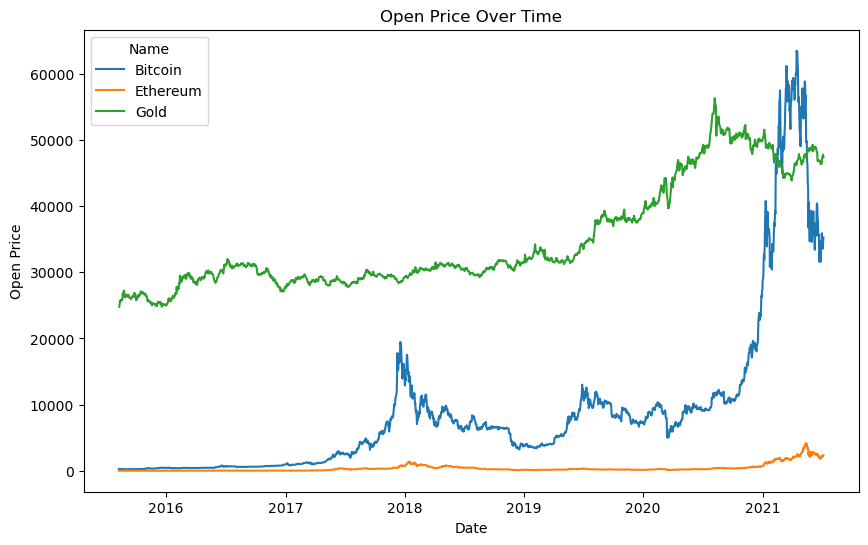

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

sns.lineplot(data=AllData, x='Date', y='Open', hue='Name')

plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')

plt.show()


ETH выглядит довольно равномерно, но это, вероятно, из-за большого масштаба. Рассмотрим график относящийся к ETH отдельно.

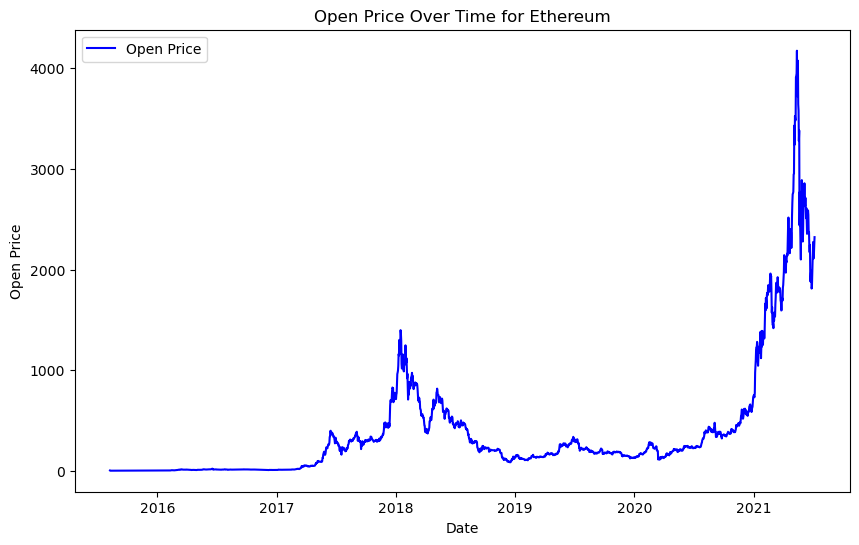

In [ ]:
ethereum_data = AllData[AllData['Name'] == 'Ethereum']

plt.figure(figsize=(10, 6))

plt.plot(ethereum_data['Date'], ethereum_data['Open'], label='Open Price', color='blue', linestyle='solid')

plt.title('Open Price Over Time for Ethereum')
plt.xlabel('Date')
plt.ylabel('Open Price')

plt.legend()

plt.show()



Из-за различия в масштабах, может оказаться полезным рассмотреть ежедневный процентное изменения рассматриваемых активов.

In [ ]:
B2 = B1.copy()
B2['Percent_Change'] = (B2['Open'] / B2['Open'].shift(1) - 1) * 100

E2 = E1.copy()
E2['Percent_Change'] = (E2['Open'] / E2['Open'].shift(1) - 1) * 100

G2 = G1.copy()
G2['Percent_Change'] = (G2['Open'] / G2['Open'].shift(1) - 1) * 100

AllData = pd.concat([B2, E2, G2], ignore_index=True)

AllData['Date'] = pd.to_datetime(AllData['Date'])

AllData = AllData[(AllData['Date'] >= pd.to_datetime('2015-08-08')) & (AllData['Date'] <= pd.to_datetime('2021-07-06'))]
print(AllData)

         Name                Date          High           Low          Open  \
831   Bitcoin 2015-08-08 23:59:59    279.928009    260.709991    279.742004   
832   Bitcoin 2015-08-09 23:59:59    267.002991    260.467987    261.115997   
833   Bitcoin 2015-08-10 23:59:59    267.032013    262.596008    265.477997   
834   Bitcoin 2015-08-11 23:59:59    270.385986    264.093994    264.342010   
835   Bitcoin 2015-08-12 23:59:59    270.673004    265.468994    270.597992   
...       ...                 ...           ...           ...           ...   
7092     Gold 2021-06-30 00:00:00  46858.000000  46372.000000  46448.000000   
7093     Gold 2021-07-01 00:00:00  47999.000000  46837.000000  46882.000000   
7094     Gold 2021-07-02 00:00:00  47553.000000  47200.000000  47200.000000   
7095     Gold 2021-07-05 00:00:00  48704.000000  47075.000000  47800.000000   
7096     Gold 2021-07-06 00:00:00  47971.000000  47418.000000  47418.000000   

             Close      Volume  Percent_Change  
83

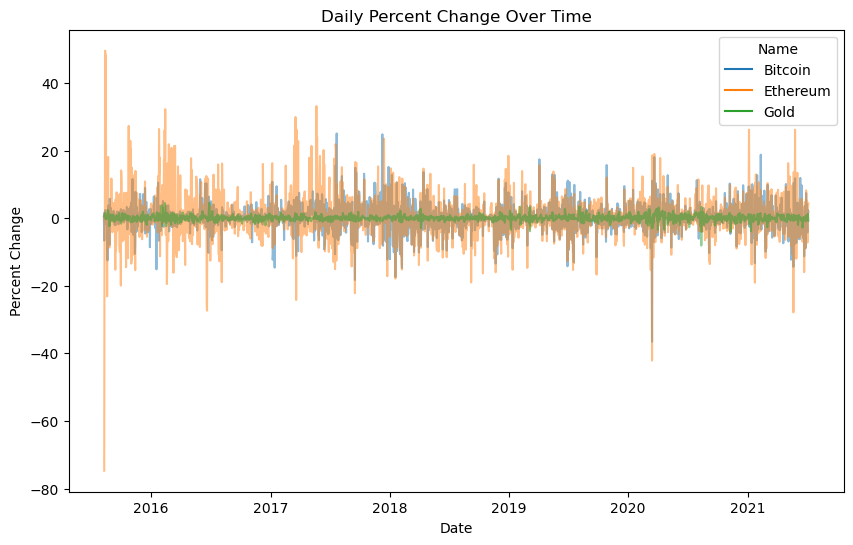

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

sns.lineplot(data=AllData, x='Date', y='Percent_Change', hue='Name', alpha=0.5)

plt.title('Daily Percent Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percent Change')

plt.show()


Из графика видно, что ETH очень волатилен по сравнению с GOLD. Давайте для большей наглядности выведем среднее данной величины для каждого актива.

In [ ]:
average_daily_percent_change = AllData.groupby('Name')['Percent_Change'].mean()

average_daily_percent_change = average_daily_percent_change.reset_index()
average_daily_percent_change.columns = ['Coin', 'Average Daily Percent Change']

average_daily_percent_change

,Coin,Average Daily Percent Change
0,Bitcoin,0.303378
1,Ethereum,0.532428
2,Gold,0.046904


Переформатируем данные для дальнейшей работы с ними.

In [ ]:
WideDataPC = AllData[['Date', 'Name', 'Percent_Change']].pivot(index='Date', columns='Name', values='Percent_Change')
WideDataPC['Gold'] = WideDataPC['Gold'].shift(+1)

WideDataPC = WideDataPC.iloc[3:]

WideDataPC = WideDataPC[WideDataPC.index.time != pd.Timestamp('00:00:00').time()]

WideDataPC.dropna(inplace=True)

WideDataPC

Name,Bitcoin,Ethereum,Gold
Date,,,
2015-08-10 23:59:59,1.670522,1.112113,0.478081
2015-08-11 23:59:59,-0.427902,-0.826622,0.987903
2015-08-12 23:59:59,2.366624,49.522586,1.417449
2015-08-13 23:59:59,-1.631563,15.441788,1.515748
2015-08-14 23:59:59,-0.770532,48.164030,-0.306380
...,...,...,...
2021-06-29 23:59:59,-0.586989,5.151053,0.687500
2021-06-30 23:59:59,4.156070,3.876630,-0.580064
2021-07-01 23:59:59,-2.429531,5.091044,0.934378


In [ ]:
correlation_matrix = WideDataPC[['Bitcoin', 'Ethereum', 'Gold']].corr(method='spearman')
correlation_matrix

Name,Bitcoin,Ethereum,Gold
Name,,,
Bitcoin,1.000000,0.530578,0.050804
Ethereum,0.530578,1.000000,0.015935
Gold,0.050804,0.015935,1.000000


Видно, что GOLD не коррелирует с BTC или ETH.

Выводы из данного исследования:

BTC, ETH и GOLD выросли за этот период времени.
ETH очень волатилен, а GOLD достаточно стабильное.
ETH вырос больше всего в процентах, поэтому он был бы интересен для инвестиций в этот период времени.
GOLD не коррелирует с BTC или ETH.

## 5) QQ-plot



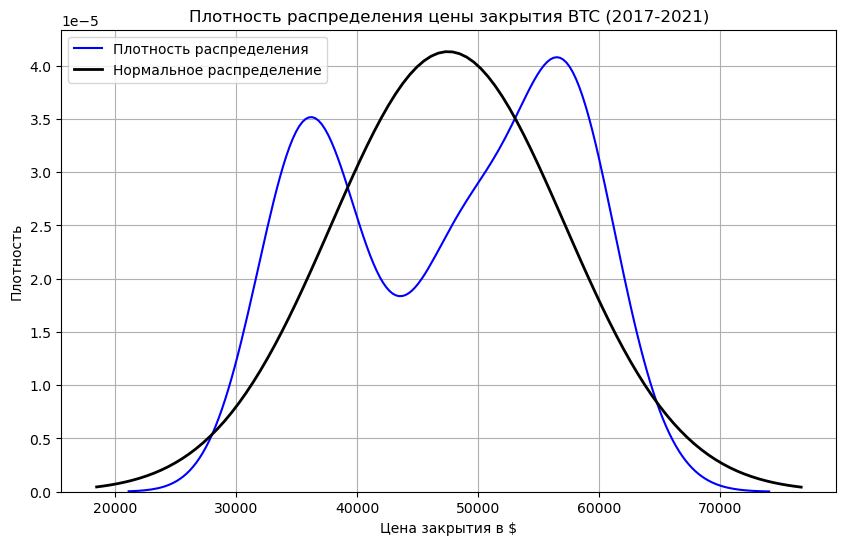

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, poisson

bitcoin = pd.read_csv('coin_Bitcoin.csv')

bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

start_date = '2021-01-29'
end_date = '2021-07-06'
filtered_data = bitcoin[(bitcoin['Date'] >= start_date) & (bitcoin['Date'] <= end_date)]

mean_close = filtered_data['Close'].mean()
std_close = filtered_data['Close'].std()

plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data['Close'], color='blue', label='Плотность распределения', common_norm=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_close, std_close)
plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')

plt.title('Плотность распределения цены закрытия BTC (2017-2021)')
plt.xlabel('Цена закрытия в $')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

По графику видно, что распредление цены закрытия сильно отличается от нормального. Попробуем подобрать более подходящее нормальное распределние с двумя модами.

Для оценки соответсвия распределения рассмотритим квантиль-квантиль график (QQ-plot). Также построим QQ-plot для маркеткапы.

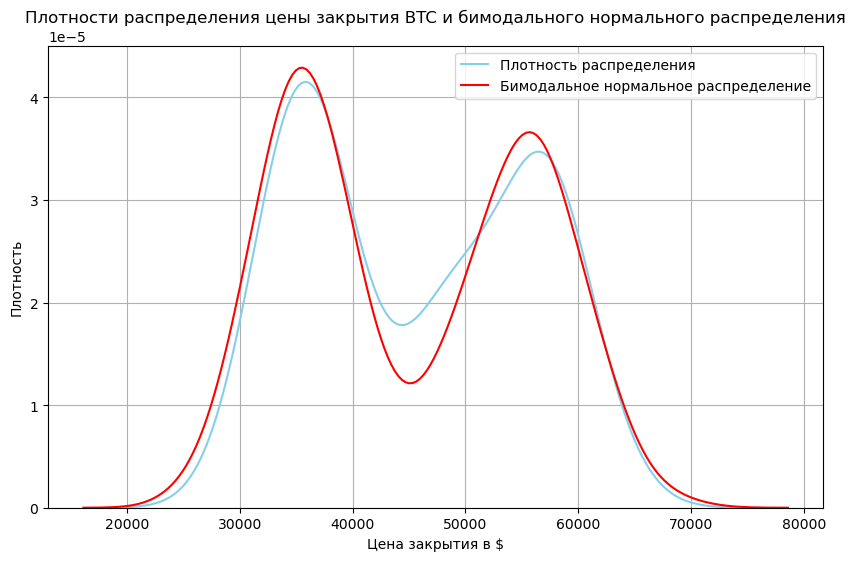

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, poisson

bitcoin = pd.read_csv('coin_Bitcoin.csv')

bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

start_date = '2021-01-01'
end_date = '2021-07-05'
filtered_data = bitcoin[(bitcoin['Date'] >= start_date) & (bitcoin['Date'] <= end_date)]

plt.figure(figsize=(10, 6))

sns.kdeplot(filtered_data['Close'], color='skyblue', label='Плотность распределения')

data1 = np.random.normal(loc=35500, scale=4000, size=1000)
data2 = np.random.normal(loc=55000, scale=5000, size=1000)
combined_data = np.concatenate((data1, data2), axis=0)

sns.kdeplot(combined_data, color='red', label='Бимодальное нормальное распределение')

plt.title('Плотности распределения цены закрытия BTC и бимодального нормального распределения')
plt.xlabel('Цена закрытия в $')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

Мы попробовали подобрать распределение, наиболее похожее на распределение цены закрытия BTC. К сожалению, даже бимодальное нормальное распределение оказалось довольно далеким.

Видно, что распределения в окрестности мод похожи. Возьмем их по отдельности и сравним. 

Для этого отрежем хвосты на 25000 и 68000 и разделим график напополам мат ожиданием.

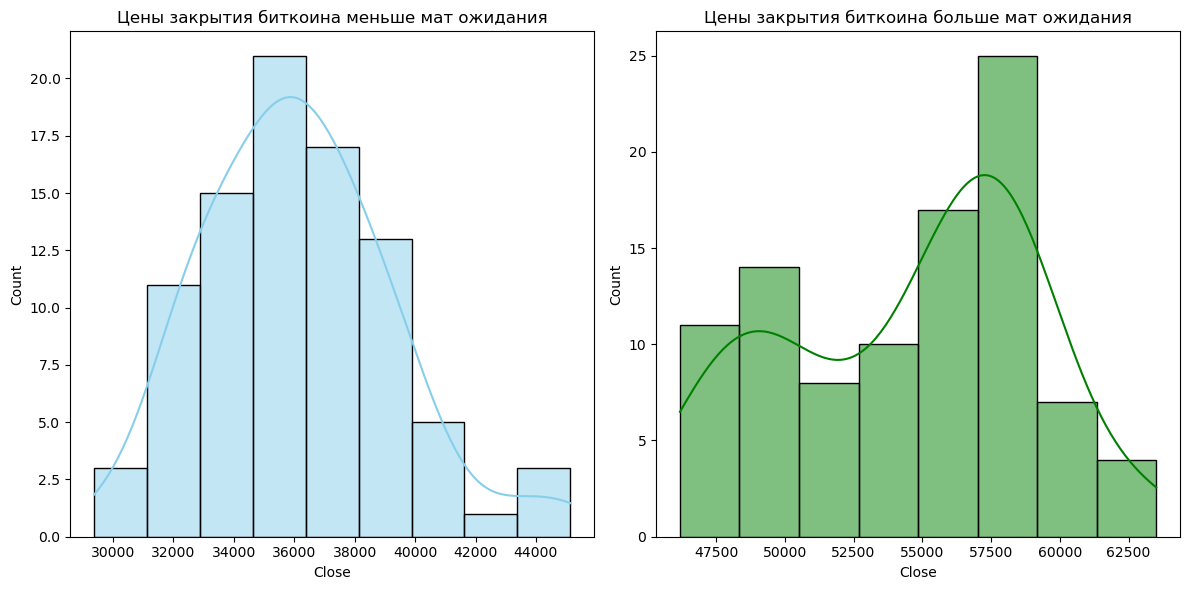

Статистика теста Колмогорова-Смирнова: 1.0
p-value: 7.942036846388091e-55


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, poisson

bitcoin = pd.read_csv('coin_Bitcoin.csv')

bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

# Определение временного периода
start_date = '2021-01-01'
end_date = '2021-07-05'
filtered_data = bitcoin[(bitcoin['Date'] >= start_date) & (bitcoin['Date'] <= end_date)]

# Вычисление математического ожидания цены закрытия биткоина
mean_close = filtered_data['Close'].mean()

# Разделение данных на две части: те, что меньше математического ожидания, и те, что больше
data_below_mean = filtered_data[filtered_data['Close'] < mean_close]
data_above_mean = filtered_data[filtered_data['Close'] > mean_close]

# Обрезание хвостов close меньше 25000 и больше 68000
data_below_mean = data_below_mean[data_below_mean['Close'] > 25000]
data_above_mean = data_above_mean[data_above_mean['Close'] < 68000]

# Построение двух графиков зависимости частоты от цены
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data_below_mean, x='Close', color='skyblue', kde=True)
plt.title('Цены закрытия биткоина меньше мат ожидания')

plt.subplot(1, 2, 2)
sns.histplot(data=data_above_mean, x='Close', color='green', kde=True)
plt.title('Цены закрытия биткоина больше мат ожидания')

plt.tight_layout()
plt.show()

from scipy.stats import ks_2samp

# Вычисление статистики и p-value для теста Колмогорова-Смирнова
statistic, p_value = ks_2samp(data_below_mean['Close'], data_above_mean['Close'])

# Вывод результатов теста
print("Статистика теста Колмогорова-Смирнова:", statistic)
print("p-value:", p_value)

Результаты теста Колмогорова-Смирнова позволяют нам сделать вывод о значимом различии между двумя распределениями.

Значение статистики теста равно 1.0, что указывает на максимальное различие между двумя распределениями.
p-value очень близко к 0, что гораздо меньше обычного уровня значимости 0.05.
Это означает, что мы можем отклонить нулевую гипотезу о сходстве распределений.

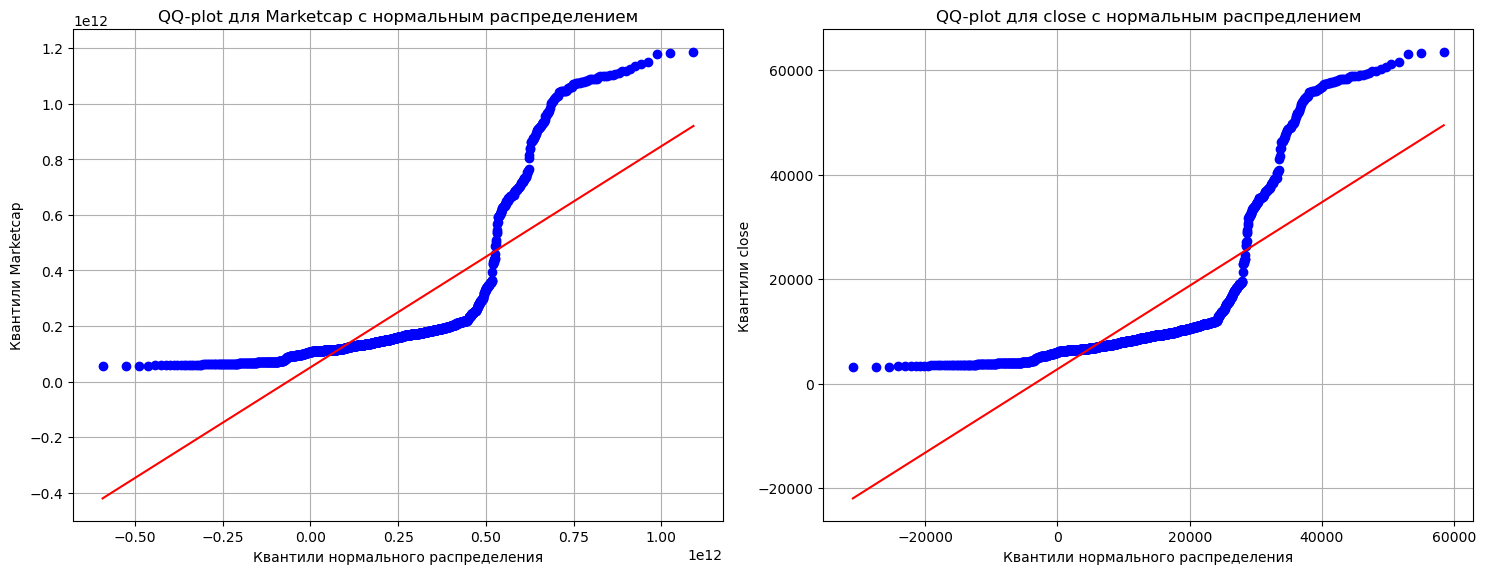

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

bitcoin = pd.read_csv('coin_Bitcoin.csv')

bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

start_date = '2017-09-29'
end_date = '2021-07-06'
filtered_data = bitcoin[(bitcoin['Date'] >= start_date) & (bitcoin['Date'] <= end_date)]

mean_close = filtered_data['Close'].mean()
std_close = filtered_data['Close'].std()

empirical_data = filtered_data['Close'].sort_values()

empirical_data_marketcap = filtered_data['Marketcap']

mean_marketcap = empirical_data_marketcap.mean()
std_marketcap = empirical_data_marketcap.std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

stats.probplot(empirical_data, dist="norm",sparams=(mean_close, std_close),  plot=ax2)
ax2.set_title('QQ-plot для close с нормальным распредлением')
ax2.set_xlabel('Квантили нормального распределения')
ax2.set_ylabel('Квантили close')
ax2.grid(True)

stats.probplot(empirical_data_marketcap, dist="norm", sparams=(mean_marketcap, std_marketcap), plot=ax1)
ax1.set_title('QQ-plot для Marketcap с нормальным распределением')
ax1.set_xlabel('Квантили нормального распределения')
ax1.set_ylabel('Квантили Marketcap')
ax1.grid(True)

plt.tight_layout()  # автоматически подгоняет расположение subplot'ов
plt.show()

Очевидно, что распределение цены закрытия и маркеткапы не имеют отношенения к нормальному распределению. 

Эмпирическое распредление имеет тяжелые хвосты, те есть много резко отличающихся данных. В целом, неудивительно, тк распределения цен валют редко подчиняются нормальному закону.

Зато из этих графиков видно (да, так можно сравнивать), что Marketcap и close имеют похожие распределения.

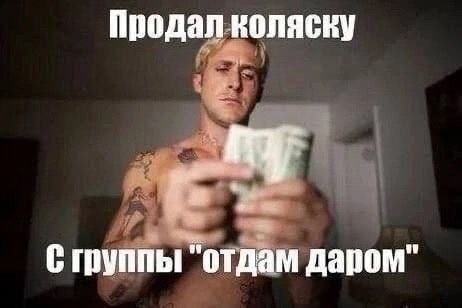